# DATA SCIENCE Kaggle Assignment


Problem Statement: Use statistical methods to identify the most effective treatment strategies for OCD based on given patient details, clinical data, and treatment history. 
This could help to inform the development of new and more effective OCD treatments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
df = pd.read_csv(r'C:\Users\Ashish Shah\Downloads\ocd_patient_dataset.csv', encoding = 'unicode_escape')

In [4]:
df.shape #shows number of (rows,columns)

(1500, 17)

In [5]:
df.head() #prints top 5 rows, can change the number by mentioning the number of rows in the brackets

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15-07-2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28-04-2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02-02-2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25-08-2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20-02-2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [6]:
df.info() #gives information like the data type of different columns in the dataframe/csv file/dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

# DATA CLEANING

In [7]:
#check for null values
pd.isnull(df).sum() #w/o sum() it gives true and false value; sum does the total of null values

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [12]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe() #gives description of all the numeric columns in dataframe

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,925.000000,925.000000,925.000000,925.000000,925.000000
mean,5581.458378,46.645405,123.283243,20.063784,19.612973
std,2594.386689,16.911269,67.483506,11.803827,11.871673
min,1017.000000,18.000000,6.000000,0.000000,0.000000
25%,3324.000000,32.000000,66.000000,10.000000,9.000000
50%,5667.000000,47.000000,125.000000,20.000000,20.000000
75%,7806.000000,61.000000,179.000000,30.000000,29.000000
max,9995.000000,75.000000,239.000000,40.000000,40.000000


# Exploratory Data Analysis 

EDA is an analysis approach that identifies general pattern in data.

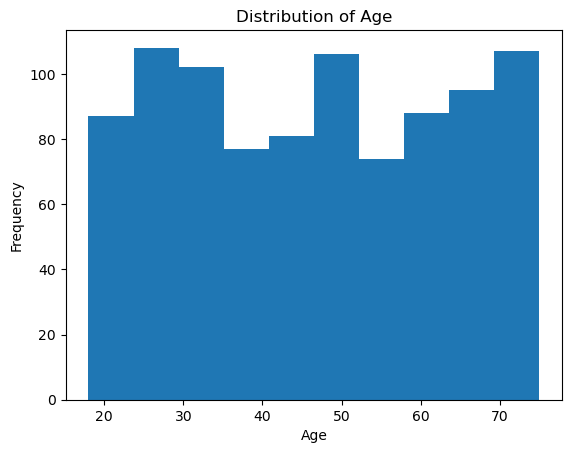

In [13]:
#Histogram based on age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

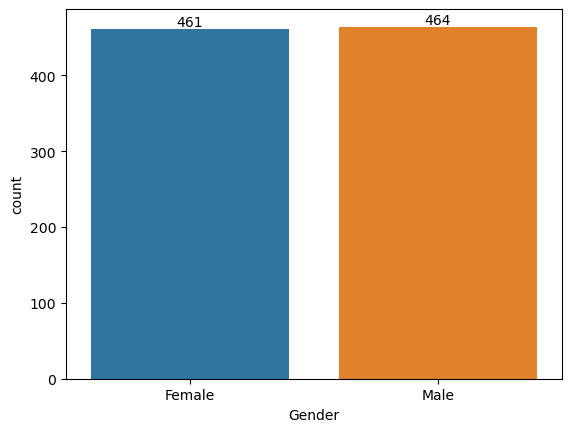

In [14]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df) #countplot counts the number and plots it

for bars in ax.containers: #for labels for the bars that shows the count value
    ax.bar_label(bars)

from the above graph, we can say that more number of males have OCD than females.

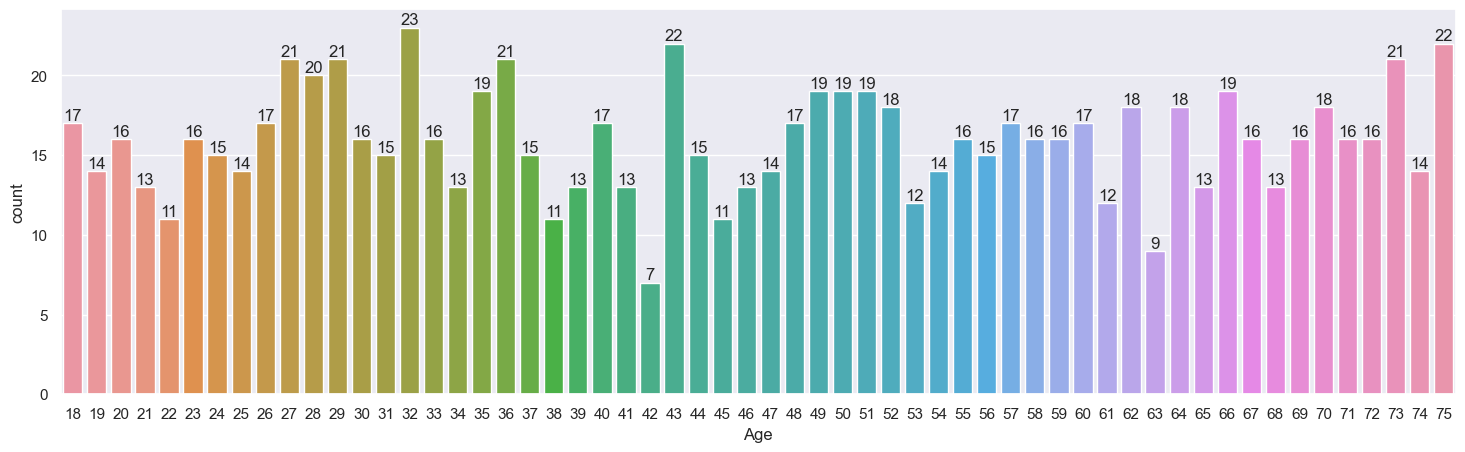

In [17]:
ax = sns.countplot(x = 'Age',data = df) #countplot counts the number and plots it

for bars in ax.containers: #for labels for the bars that shows the count value
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)}) #chartsize: syntax-- (width,height)

from this graph, we can say that people of age 23 suffer the most with OCD. The top three ages are: 23, 43 and 75

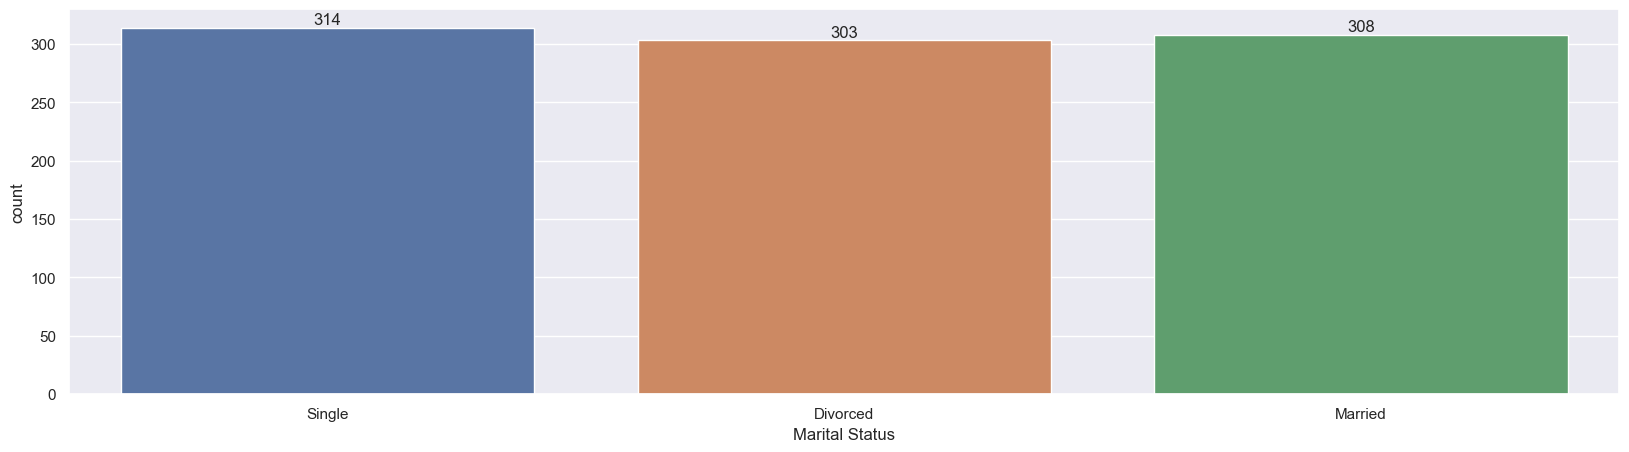

In [19]:
ax = sns.countplot(x = 'Marital Status',data = df) 
for bars in ax.containers: 
    ax.bar_label(bars)


from the above graph, we can say that singles suffer from OCD.

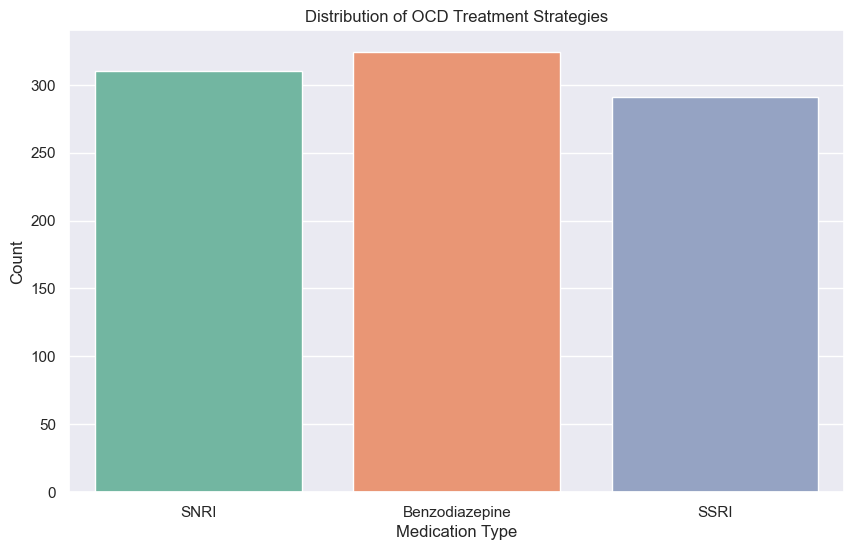

In [21]:
# Explore the distribution of treatment strategies
plt.figure(figsize=(10, 6))
sns.countplot(x='Medications', data=df, palette='Set2')
plt.title("Distribution of OCD Treatment Strategies")
plt.xlabel("Medication Type")
plt.ylabel("Count")
plt.show()

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

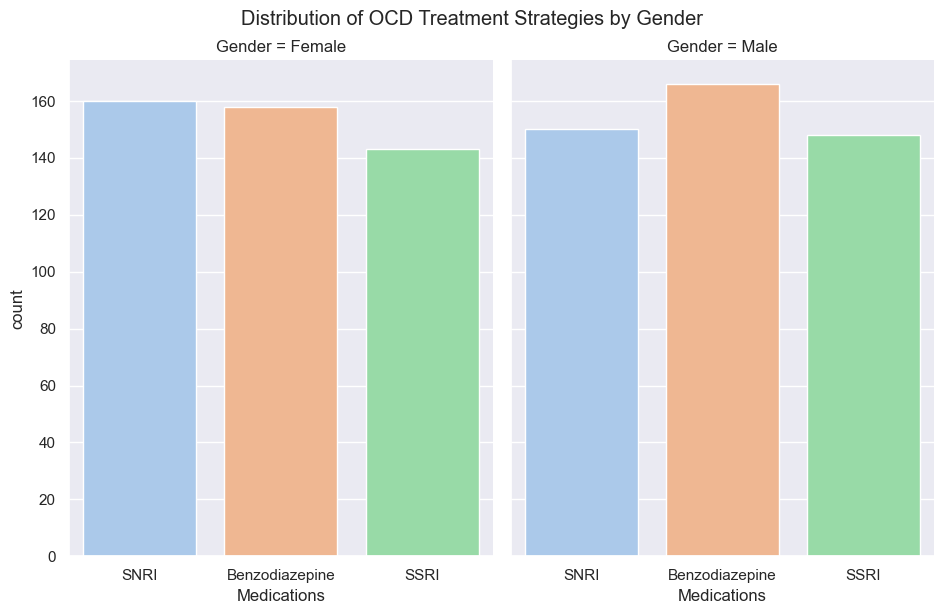

In [23]:
# Relationship between treatment strategies and demographics
plt.figure(figsize=(14, 8))
sns.catplot(x='Medications', col='Gender', data=df, kind='count', height=6, aspect=0.8, palette='pastel')
plt.suptitle("Distribution of OCD Treatment Strategies by Gender", y=1.02)
plt.show()

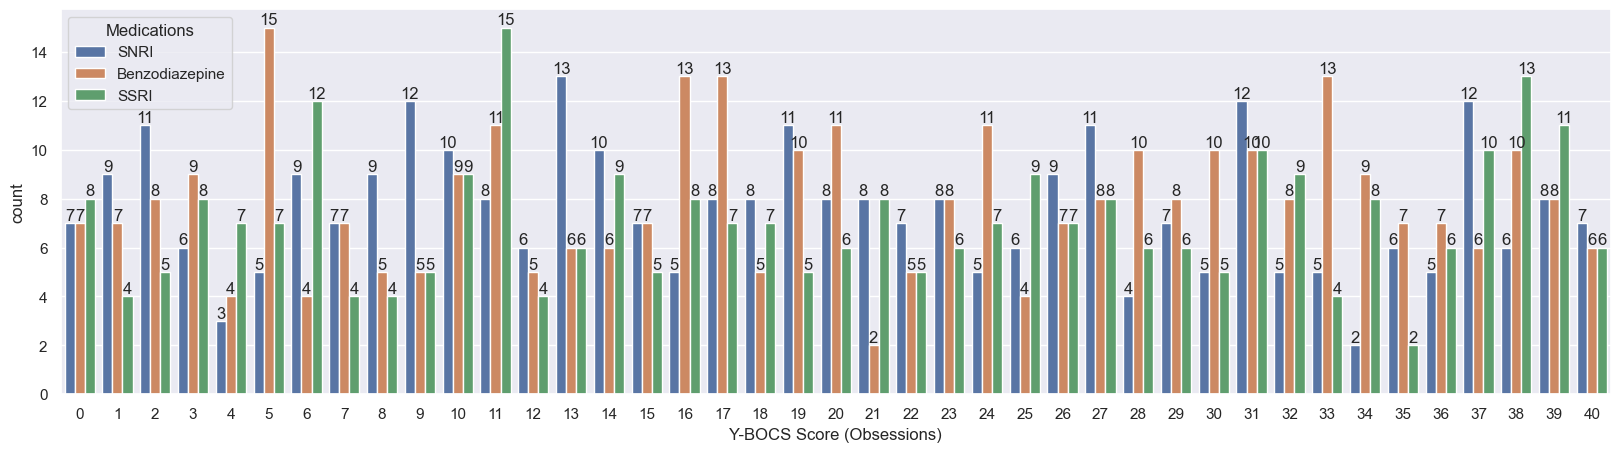

In [29]:
ax = sns.countplot(data = df, x = 'Y-BOCS Score (Obsessions)', hue = 'Medications') #hue divides the total number in two genders for simplicity

for bars in ax.containers:
    ax.bar_label(bars)

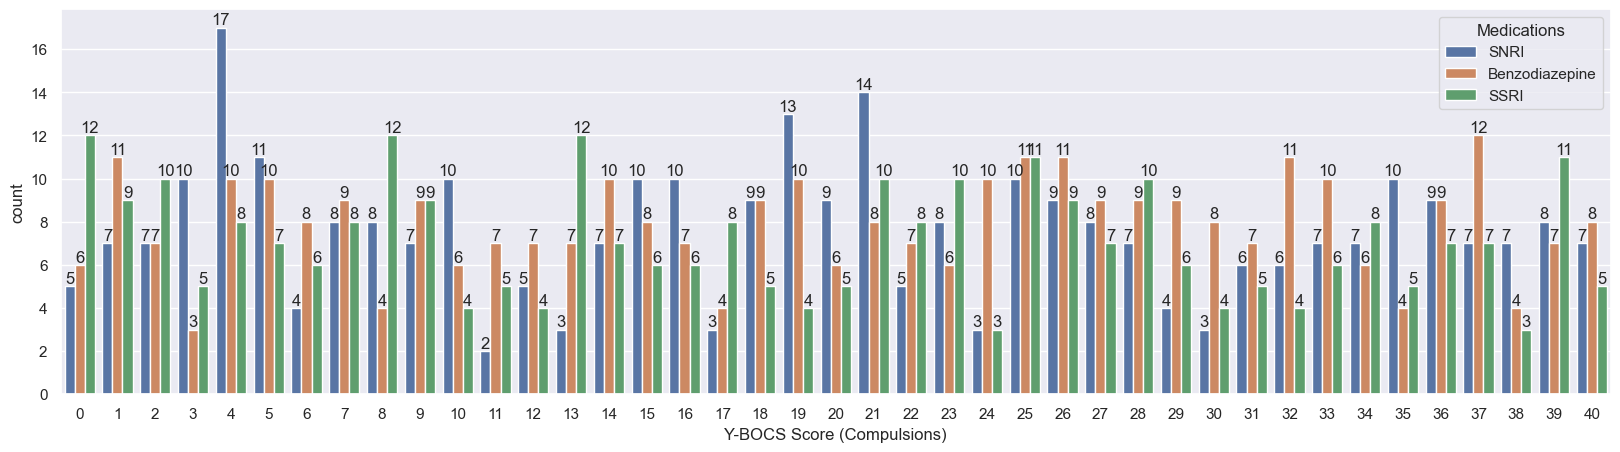

In [31]:
ax = sns.countplot(data = df, x = 'Y-BOCS Score (Compulsions)', hue = 'Medications') #hue divides the total number in two genders for simplicity

for bars in ax.containers:
    ax.bar_label(bars)

# Conclusion
The EDA provides insights into different aspects like age, gender, martial status and their relation with OCD along with the distribution of OCD treatment strategies. The statistical analysis helps identify potential relationships between treatment strategies and Y-BOCS scores.